# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\l3n3c\AppData\Local\Temp\ipykernel_26756\130313570.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [56]:
airbnb = pd.read_csv('./airbnb_hw.csv')

In [5]:
airbnb.shape

(30478, 13)

In [6]:
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [7]:
airbnb.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [8]:
airbnb.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [57]:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

In [58]:
airbnb['Host Since'] = pd.to_numeric(airbnb['Host Since'], errors='coerce')

In [59]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  0 non-null      float64
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30297 non-null  float64
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(6), int64(3), object

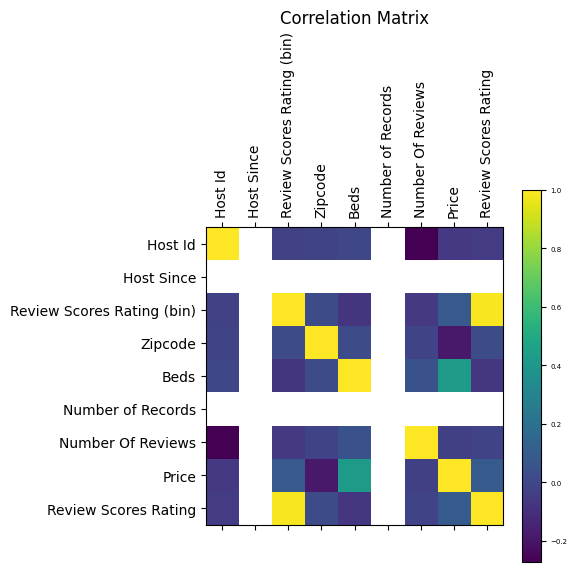

In [36]:
plt.matshow(airbnb.corr(numeric_only=True))


plt.xticks(range(airbnb.select_dtypes(['number']).shape[1]), airbnb.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(airbnb.select_dtypes(['number']).shape[1]), airbnb.select_dtypes(['number']).columns, fontsize=10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=5)

plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='Neighbourhood ', ylabel='Count'>

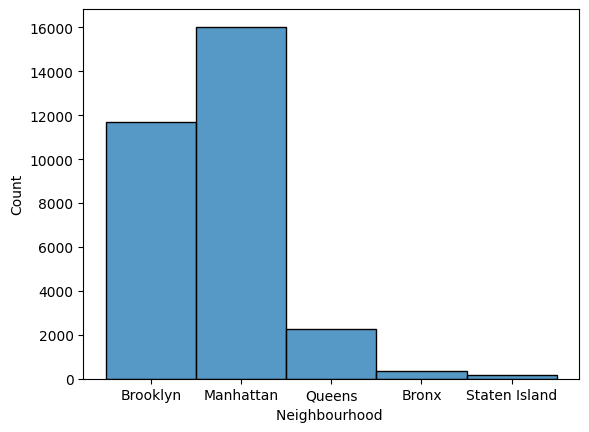

In [37]:
airbnb.columns
sns.histplot(airbnb['Neighbourhood '])

<Axes: xlabel='Property Type', ylabel='Count'>

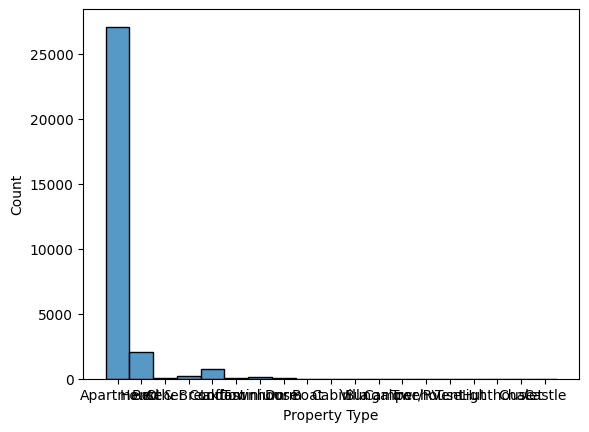

In [14]:
sns.histplot(airbnb['Property Type'])

<Axes: xlabel='Neighbourhood ', ylabel='Price'>

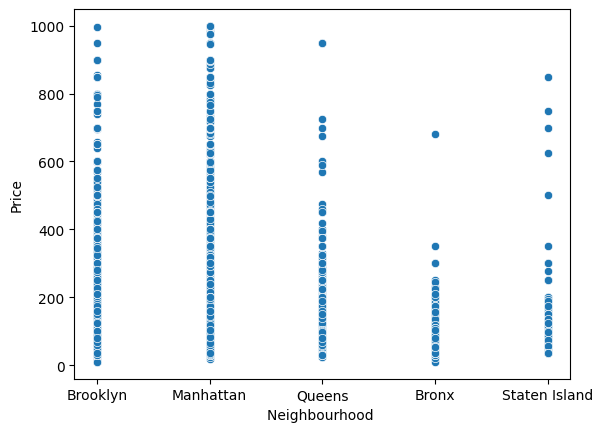

In [15]:
sns.scatterplot(x=airbnb['Neighbourhood '],y=airbnb['Price'])

In [38]:
airbnb['Host Since'] = airbnb['Host Since'].fillna(airbnb['Host Since'].median)

In [60]:
airbnb = airbnb.drop(columns=['Review Scores Rating (bin)', 'Review Scores Rating'])

In [61]:
airbnb['Zipcode'] = airbnb['Zipcode'].fillna(airbnb['Zipcode'].median)

In [62]:
airbnb['Price'] = airbnb['Price'].fillna(airbnb['Price'].median)

In [63]:
airbnb['Beds'] = airbnb['Beds'].fillna(airbnb['Beds'].median)

In [64]:
airbnb.isnull().sum()

Host Id                  0
Host Since           30478
Name                     0
Neighbourhood            0
Property Type            3
Room Type                0
Zipcode                  0
Beds                     0
Number of Records        0
Number Of Reviews        0
Price                    0
dtype: int64

2. transforming

In [65]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Host Id            30478 non-null  int64  
 1   Host Since         0 non-null      float64
 2   Name               30478 non-null  object 
 3   Neighbourhood      30478 non-null  object 
 4   Property Type      30475 non-null  object 
 5   Room Type          30478 non-null  object 
 6   Zipcode            30478 non-null  object 
 7   Beds               30478 non-null  object 
 8   Number of Records  30478 non-null  int64  
 9   Number Of Reviews  30478 non-null  int64  
 10  Price              30478 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.6+ MB


In [66]:
airbnb_tr = airbnb.copy()
airbnb = airbnb_tr.drop("Price", axis=1)
airbnb_labels = airbnb_tr["Price"].copy()

In [68]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [69]:
# using pipeline for numerical and categorical
imputer = SimpleImputer(strategy="median")
std_scaler = StandardScaler()

num_pipeline = Pipeline([
    ("imputer", imputer),
    ("std_scaler", std_scaler)
])
num_col = airbnb.select_dtypes(['number']).columns

# converting categorical data
cat_encoder = OneHotEncoder(handle_unknown="ignore")
cat_col = airbnb.select_dtypes(['object']).columns

# full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_col),
    ("cat", cat_encoder, cat_col)
])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(airbnb, airbnb_labels, test_size=0.2)

In [71]:
airbnb_prepared = full_pipeline.fit_transform(X_train)

c:\Users\l3n3c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Host Since']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'method']

In [22]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(predictions, y):

    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return rmse

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(airbnb_prepared, y_train)

lin_pred = lin_reg.predict(X_test)

lin_rmse = calculate_rmse(lin_pred, y_test)
display_scores(lin_rmse)

ValueError: Input y contains NaN.